# Imports

In [ ]:
!pip install scikit-image
!pip install scipy

In [2]:
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image
from skimage import io as skio
import skimage

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#a = np.array([[1,2,3],[4,5,6],[7,8,9]])
#print(a[:2][:,:2])

[[1 2]
 [4 5]]


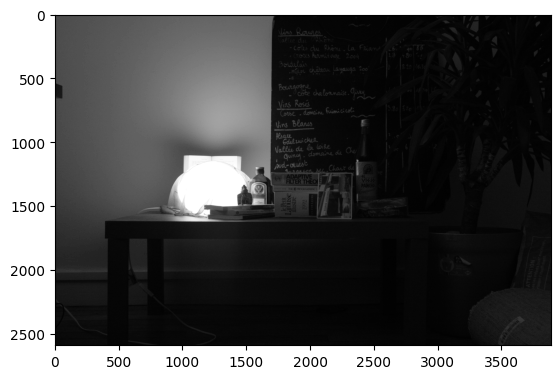

In [6]:
im = skio.imread('images/vue2.tif')
plt.imshow(im, cmap ="gray")
plt.show()

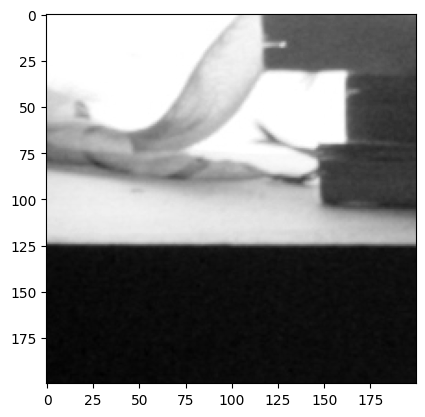

In [19]:
#im=skio.imread('/content/drive/MyDrive/Telecom/IMA/IMA201 - Introduction au traitement des images/PROJET IMA 201/images/lena.tif')
#im=skio.imread('/content/drive/MyDrive/PROJET IMA 201/images/aerien1.tif')[:100][:,:100]
im = skio.imread('images/vue2.tif')[1500:1700][:,1050:1250]
plt.imshow(im, cmap ="gray")
plt.show()

# Chromatic/ Spatial Adjustment

C:\Users\juane\AppData\Local\Temp\ipykernel_14904\2327193727.py:16: RuntimeWarning: overflow encountered in scalar subtract
  func = 20*(image[currentPixel[0]][currentPixel[1]]-image[x][y])


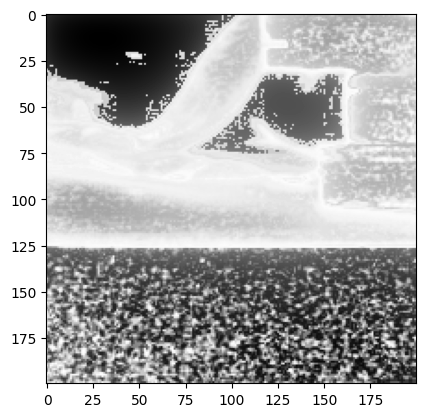

In [20]:
import math
#math.dist(currentPixel, [x,y])

rmax = 255

def calculateAdjustment(image, currentPixel):
  normalisation = 0
  for x in range(im.shape[0]):
    for y in range(im.shape[1]):
      if [x,y] != currentPixel:
        normalisation += rmax/math.dist(currentPixel, [x,y])
  sum = 0
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      if [x,y] != currentPixel:
        func = 20*(image[currentPixel[0]][currentPixel[1]]-image[x][y])
        if func > 255:
          func = 255
        elif func < -255:
          func = -255
        sum += func/math.dist(currentPixel, [x,y])
  return (sum/normalisation)

R = np.zeros(im.shape)
for x in range(im.shape[0]):
  for y in range(im.shape[1]):
    R[x][y] = calculateAdjustment(im, [x,y])

plt.imshow(R, cmap ="gray")
plt.show()

# (math.dist(p, q))

# Dynamic Tone Reproduction Scaling

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


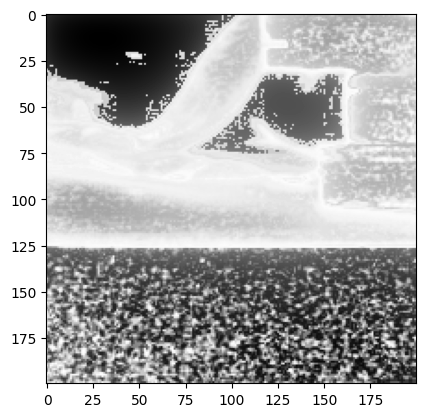

In [21]:
#im=skio.imread('/content/drive/MyDrive/Telecom/IMA/IMA201 - Introduction au traitement des images/PROJET IMA 201/images/brain.tif')
#gray_chair = skimage.color.rgb2gray(im)
#R = im
#R = gray_chair

plt.imshow(R, cmap ="gray")
plt.show()

In [22]:
min_pixel = 255
max_pixel = 0

for raw in R:
  for pixel in raw:
    if pixel < min_pixel:
      min_pixel = pixel
    if pixel > max_pixel:
      max_pixel = pixel


mc = min_pixel

Mc = max_pixel

In [23]:
sc = 255 / (Mc - mc)

In [24]:
(y,x)=R.shape
O = np.zeros((y,x))

for i in range(y):
  for j in range(x):
    O[i,j] = round((127.5 + sc*R[i,j]))

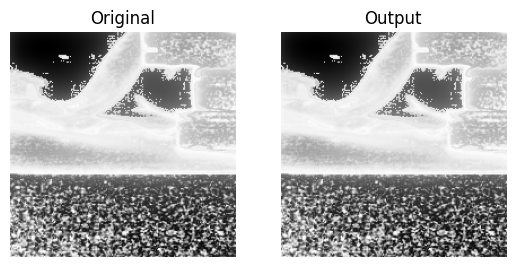

In [25]:
fig, axs = plt.subplots(1, 2)
axs[0].axis("off")
axs[0].imshow(R, cmap ="gray")
axs[0].set_title('Original')
axs[1].axis("off")
axs[1].imshow(O, cmap ="gray")
axs[1].set_title('Output')


plt.show()

In [26]:
O.mean()

597.84075

In [27]:
im.mean()

127.482175

In [ ]:
difference = 0
for i in range(100):
  for j in range(100):
    difference += R[i,j] - O[i,j]
print(difference)

657165245.9136353


# Test

**Histograms**

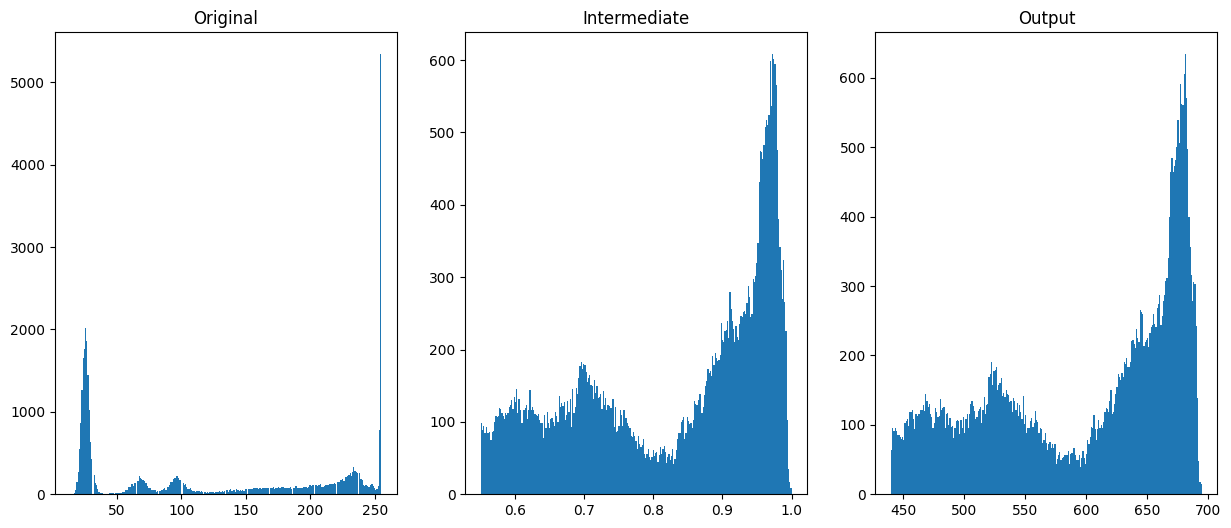

In [32]:
fig, axs = plt.subplots(1, 3)

fig.set_figheight(6)
fig.set_figwidth(15)

axs[0].hist(im.reshape((-1,)), 255)
axs[0].set_title('Original')

axs[1].hist(R.reshape((-1,)), 255)
axs[1].set_title('Intermediate')

axs[2].hist(O.reshape((-1,)), 255)
axs[2].set_title('Output')

plt.show()

**Statistics**

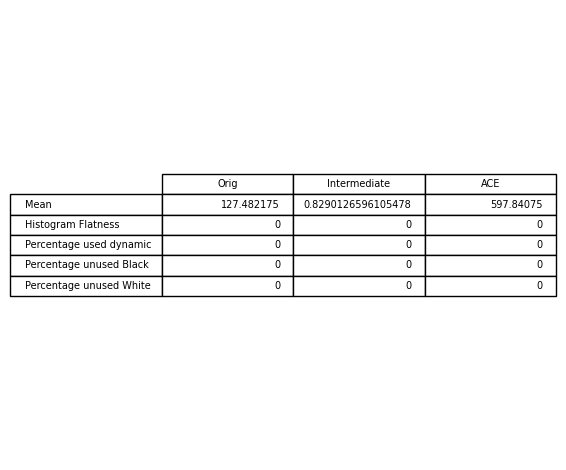

In [29]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

data = [[im.mean(), R.mean() , O.mean()],
        [0,0,0],
        [0,0,0],
        [0,0,0],
        [0,0,0]]

columns = ('Orig', 'Intermediate', 'ACE')
rows = ['Mean', 'Histogram Flatness', 'Percentage used dynamic', 'Percentage unused Black', 'Percentage unused White']


ax.table(cellText=data,
          rowLabels=rows,
          colLabels=columns,
          loc='center')


fig.tight_layout()

plt.show()

**Color Constancy**

In [30]:
def calculateColorConstancy(I1 , I2):
  Emean = 1
  Edelta = 0

  if I1.shape == I2.shape :
    (sizey,sizex)=I1.shape


    for x in range(sizex):
      for y in range(sizey):
        Edelta += I1[x,y] - I2[x,y]

    Emean = Edelta / (sizey*sizex)
  return Emean

In [31]:
calculateColorConstancy(O,im)

470.358575